## Kerasによる銀河形態分類（Hubble系列4クラス）畳み込みニューラルネット  
### Chollet, F. (2018). *Deep Learning with Python.* Manning Publications Co. Chapter 5参照


In [1]:
import os, shutil
import sys, time
import keras
print(keras.__version__)

# 作業用ディレクトリ定義（要カスタマイズ）
galaxy_data_directory = '/home/satoshi/Galaxy/'

Using TensorFlow backend.


2.2.0


#### Keras Conv2Dモデル  input_shape;150

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### モデルのコンパイル

In [3]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

#### イメージデータジェネレータ(Data augmentationあり)
#### ランダムデータセット　dataset_4class_random_256_01_4000

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator用訓練データディレクトリ
train_generator_directory = galaxy_data_directory + 'train'
# ImageDataGenerator用検証データディレクトリ
validation_generator_directory = galaxy_data_directory + 'validation'
# ImageDataGenerator用テストデータディレクトリ
test_generator_directory = galaxy_data_directory + 'test'

# 訓練データのaugmentation　
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    #shear_range=0.2, 
    zoom_range=0.2, )
    #horizontal_flip=True, )
    
# 訓練データジェネレータ　バッチサイズ：　40
train_generator = train_datagen.flow_from_directory(
        train_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(train_generator.class_indices)

# 検証データジェネレータ　バッチサイズ：　40
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(validation_generator.class_indices)

# テストデータジェネレータ　バッチサイズ：　40
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(test_generator.class_indices)

Found 8000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Found 4000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Found 4000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}


#### モデルの学習

In [5]:
# 学習　エポック数：　200
history = model.fit_generator(
        train_generator,
        # 訓練データ件数4x2000=8000, バッチサイズ40 => 8000/40=200 steps/epoch
        steps_per_epoch=200,  
        epochs=200,
        # 検証データ件数4x1000=4000, バッチサイズ40 => 4000/40=100 steps/epoch
        validation_data=validation_generator,
        validation_steps=100)

Epoch 1/200
200/200 [==============================] - 43s 216ms/step - loss: 1.0769 - acc: 0.4789 - val_loss: 0.9060 - val_acc: 0.5635
Epoch 2/200
200/200 [==============================] - 41s 204ms/step - loss: 0.9482 - acc: 0.5475 - val_loss: 0.8360 - val_acc: 0.6025
Epoch 3/200
200/200 [==============================] - 42s 210ms/step - loss: 0.8890 - acc: 0.5777 - val_loss: 0.7337 - val_acc: 0.6462
Epoch 4/200
200/200 [==============================] - 41s 207ms/step - loss: 0.8475 - acc: 0.6017 - val_loss: 0.7123 - val_acc: 0.6493
Epoch 5/200
200/200 [==============================] - 41s 205ms/step - loss: 0.8021 - acc: 0.6249 - val_loss: 0.6562 - val_acc: 0.6927
Epoch 6/200
200/200 [==============================] - 42s 208ms/step - loss: 0.7703 - acc: 0.6399 - val_loss: 0.6471 - val_acc: 0.6913
Epoch 7/200
200/200 [==============================] - 42s 208ms/step - loss: 0.7476 - acc: 0.6432 - val_loss: 0.6991 - val_acc: 0.6260
Epoch 8/200
200/200 [===========================

Epoch 61/200
200/200 [==============================] - 41s 205ms/step - loss: 0.5259 - acc: 0.7509 - val_loss: 0.4983 - val_acc: 0.7583
Epoch 62/200
200/200 [==============================] - 41s 205ms/step - loss: 0.5245 - acc: 0.7494 - val_loss: 0.4928 - val_acc: 0.7545
Epoch 63/200
200/200 [==============================] - 41s 205ms/step - loss: 0.5246 - acc: 0.7491 - val_loss: 0.4846 - val_acc: 0.7712
Epoch 64/200
200/200 [==============================] - 41s 204ms/step - loss: 0.5192 - acc: 0.7489 - val_loss: 0.5023 - val_acc: 0.7482
Epoch 65/200
200/200 [==============================] - 42s 212ms/step - loss: 0.5176 - acc: 0.7503 - val_loss: 0.4800 - val_acc: 0.7730
Epoch 66/200
200/200 [==============================] - 41s 206ms/step - loss: 0.5128 - acc: 0.7531 - val_loss: 0.4735 - val_acc: 0.7775
Epoch 67/200
200/200 [==============================] - 41s 206ms/step - loss: 0.5229 - acc: 0.7485 - val_loss: 0.5060 - val_acc: 0.7590
Epoch 68/200
200/200 [===================

200/200 [==============================] - 41s 204ms/step - loss: 0.4431 - acc: 0.8076 - val_loss: 0.4385 - val_acc: 0.8065
Epoch 180/200
200/200 [==============================] - 41s 206ms/step - loss: 0.4531 - acc: 0.7967 - val_loss: 0.4797 - val_acc: 0.7875
Epoch 181/200
200/200 [==============================] - 41s 204ms/step - loss: 0.4455 - acc: 0.7991 - val_loss: 0.4344 - val_acc: 0.8090
Epoch 182/200
200/200 [==============================] - 41s 204ms/step - loss: 0.4409 - acc: 0.7961 - val_loss: 0.5103 - val_acc: 0.7652
Epoch 183/200
200/200 [==============================] - 41s 205ms/step - loss: 0.4441 - acc: 0.8002 - val_loss: 0.4445 - val_acc: 0.8018
Epoch 184/200
200/200 [==============================] - 41s 205ms/step - loss: 0.4422 - acc: 0.8014 - val_loss: 0.4938 - val_acc: 0.7908
Epoch 185/200
200/200 [==============================] - 41s 205ms/step - loss: 0.4508 - acc: 0.8025 - val_loss: 0.4321 - val_acc: 0.8125
Epoch 186/200
200/200 [=========================

In [6]:
# モデルの退避
model.save(galaxy_data_directory + 'galaxy_cnn_4class_256px_sf01_random_model.h5')

#### 学習履歴のビジュアル化

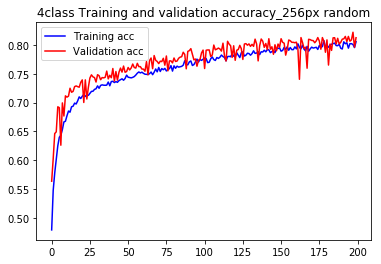

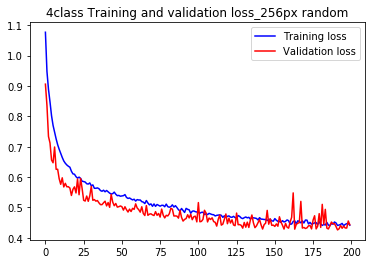

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('4class Training and validation accuracy_256px random')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('4class Training and validation loss_256px random')
plt.legend()

plt.show()

#### テストデータセットによる精度評価

In [8]:
metric = model.evaluate_generator(test_generator)
print('Test loss = ', metric[0])
print('Test acc  = ', metric[1])

Test loss =  0.45960762530565263
Test acc  =  0.8047499960660934


#### テストデータセットからサンプリングした銀河イメージデータについての形態クラス予測結果

{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Edgeon_5_7_59_587739809946402946.jpeg
Edgeon : 94%   S : 2%   SB : 2%   En : 0%   


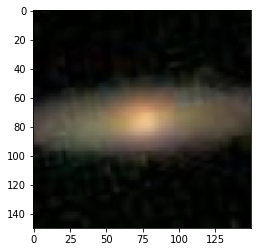

Edgeon_3_13_56_587733427622576217.jpeg
Edgeon : 77%   SB : 11%   S : 10%   En : 0%   


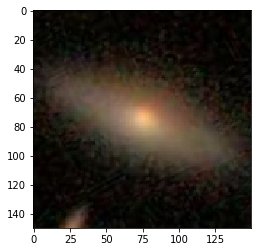

Edgeon_6_11_39_588848900427939887.jpeg
Edgeon : 40%   SB : 31%   S : 28%   En : 0%   


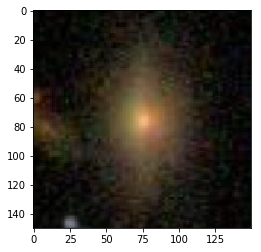

Edgeon_9_11_21_587725550137376856.jpeg
Edgeon : 52%   S : 28%   SB : 18%   En : 1%   


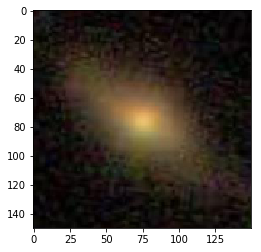

Edgeon_6_5_50_587739810500051409.jpeg
Edgeon : 99%   S : 0%   SB : 0%   En : 0%   


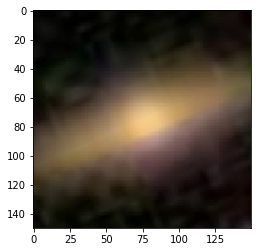

Edgeon_3_5_61_587728678466224156.jpeg
Edgeon : 99%   S : 0%   SB : 0%   En : 0%   


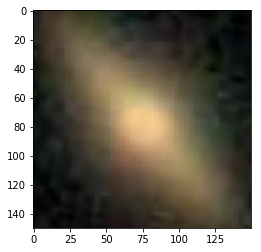

Edgeon_7_10_52_587734891680628836.jpeg
Edgeon : 99%   SB : 0%   S : 0%   En : 0%   


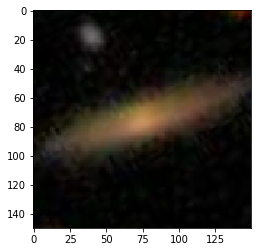

Edgeon_4_4_67_588016840167195272.jpeg
Edgeon : 96%   S : 3%   SB : 0%   En : 0%   


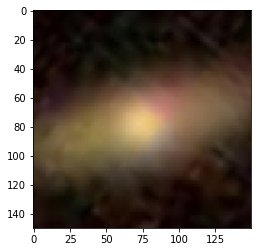

Edgeon_3_10_63_588848898835218598.jpeg
Edgeon : 99%   S : 0%   SB : 0%   En : 0%   


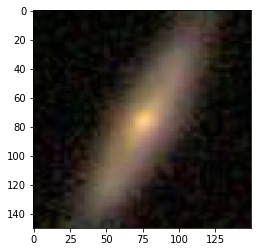

Edgeon_0_9_102_587731869632495783.jpeg
Edgeon : 99%   SB : 0%   S : 0%   En : 0%   


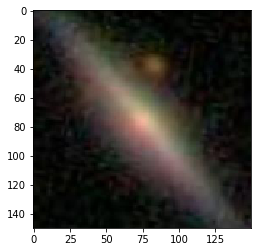

En_999_6_22_587742904479776853.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


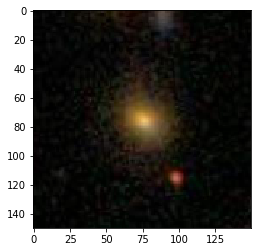

En_999_13_2_587725504482574513.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


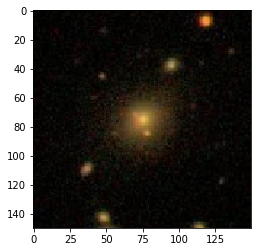

En_3_9_41_587729386617634860.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


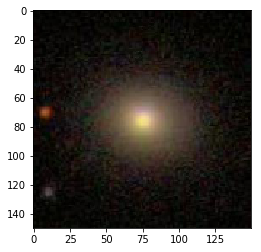

En_9_4_44_587736546318549028.jpeg
En : 100%   S : 0%   SB : 0%   Edgeon : 0%   


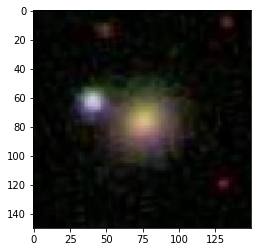

En_1_7_117_588017625081446493.jpeg
En : 99%   Edgeon : 0%   SB : 0%   S : 0%   


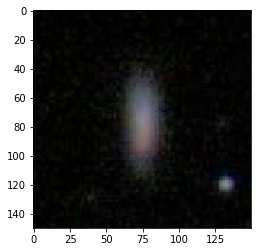

En_999_6_22_587725040634822756.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


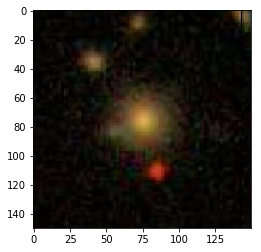

En_2_10_67_587739132962340915.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


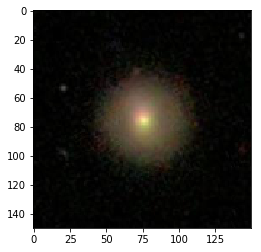

En_7_10_59_588015509281898683.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


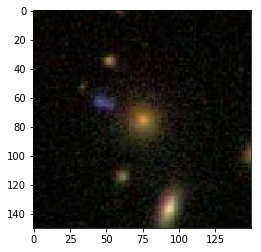

En_999_9_18_587733399720952023.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


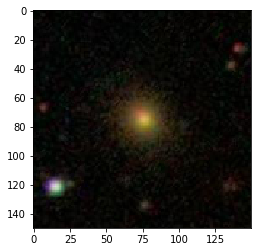

En_5_7_55_587732702316396720.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


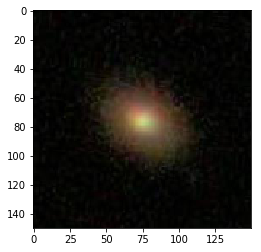

S_3_7_68_587738194509824134.jpeg
S : 62%   SB : 37%   Edgeon : 0%   En : 0%   


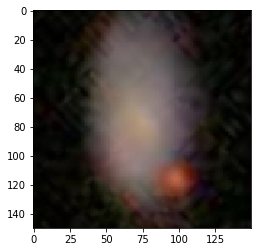

S_4_9_75_587728930808135832.jpeg
S : 70%   SB : 29%   Edgeon : 0%   En : 0%   


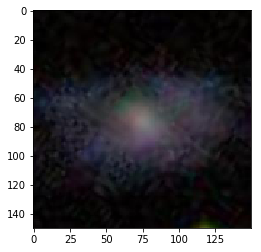

S_6_9_45_587732769977270376.jpeg
SB : 47%   S : 46%   Edgeon : 5%   En : 0%   


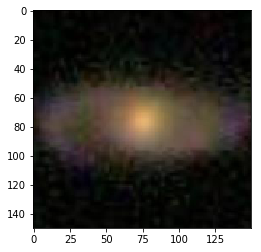

S_10_6_44_587736526445674674.jpeg
SB : 67%   S : 31%   Edgeon : 1%   En : 0%   


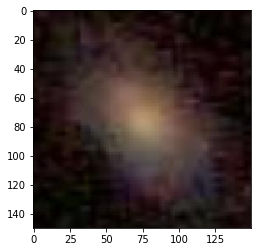

S_7_5_57_588017626164756751.jpeg
S : 64%   SB : 31%   Edgeon : 3%   En : 0%   


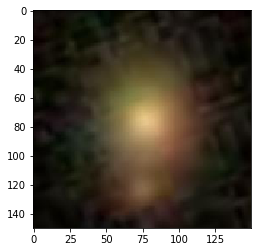

S_1_11_106_587742189906428058.jpeg
SB : 64%   S : 35%   Edgeon : 0%   En : 0%   


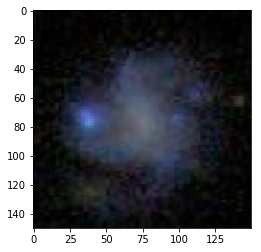

S_7_7_52_587729388222611659.jpeg
S : 53%   SB : 46%   Edgeon : 0%   En : 0%   


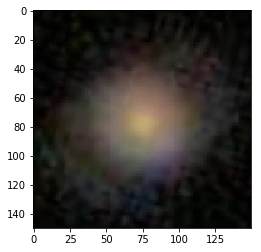

S_6_8_60_587728308567212204.jpeg
SB : 38%   S : 36%   Edgeon : 24%   En : 0%   


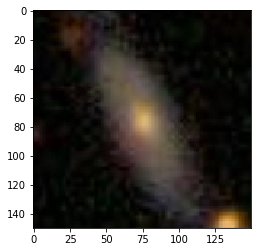

S_9_6_46_587730847966101564.jpeg
S : 54%   SB : 40%   Edgeon : 4%   En : 0%   


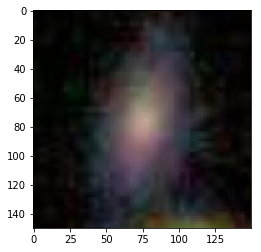

S_8_6_50_588013382728024226.jpeg
S : 73%   SB : 26%   Edgeon : 0%   En : 0%   


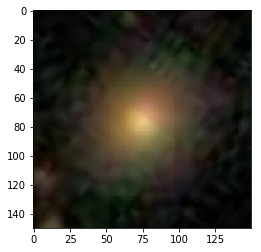

SB_6_12_39_588023668629897293.jpeg
SB : 97%   S : 2%   Edgeon : 0%   En : 0%   


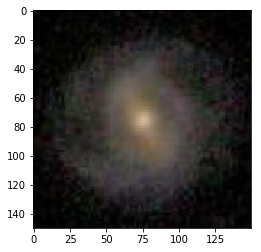

SB_6_6_59_588017603606151328.jpeg
S : 46%   SB : 43%   Edgeon : 9%   En : 0%   


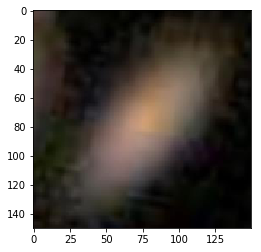

SB_9_4_43_587739130812366862.jpeg
SB : 52%   S : 46%   Edgeon : 1%   En : 0%   


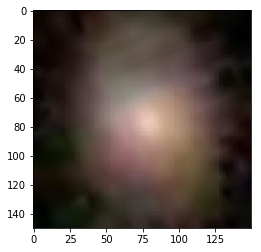

SB_9_14_37_587732589568000107.jpeg
Edgeon : 51%   SB : 35%   S : 12%   En : 0%   


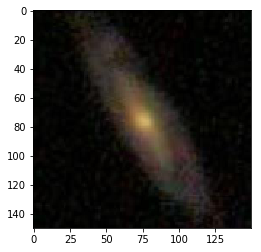

SB_10_6_42_587742576987996346.jpeg
S : 70%   SB : 29%   Edgeon : 0%   En : 0%   


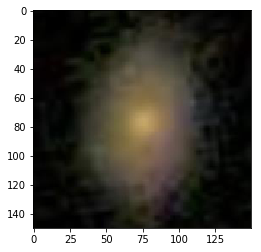

SB_11_6_41_587736915681214771.jpeg
SB : 97%   S : 2%   Edgeon : 0%   En : 0%   


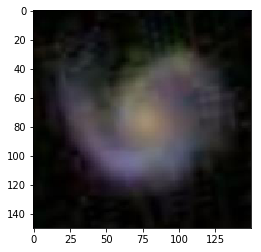

SB_9_10_28_587726015611732168.jpeg
Edgeon : 43%   S : 35%   SB : 20%   En : 0%   


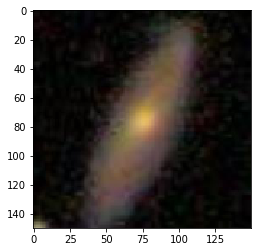

SB_7_9_58_587735240099692837.jpeg
En : 77%   SB : 12%   S : 9%   Edgeon : 0%   


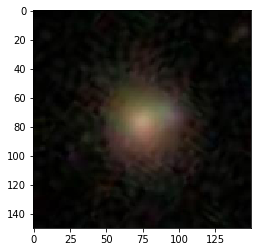

SB_6_6_45_588015508750336149.jpeg
S : 63%   SB : 30%   En : 4%   Edgeon : 2%   


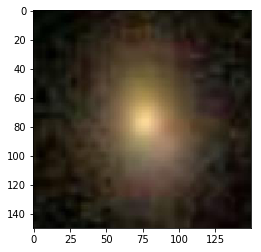

SB_6_7_67_587739828205453474.jpeg
SB : 51%   S : 43%   Edgeon : 5%   En : 0%   


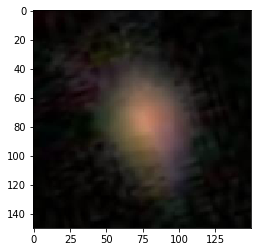

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

#クラス予測サンプリング数
sample_size = 10

class_indices_dict = test_generator.class_indices
print(class_indices_dict)
class_list = list(class_indices_dict.keys())

for class_name in class_list:
    prediction_fnames_series = pd.Series(np.array(os.listdir(test_generator_directory + '/' + class_name)))
    prediction_fnames_selected = prediction_fnames_series.sample(n=sample_size).values
    
    for prediction_fname in prediction_fnames_selected:
        print(prediction_fname)
        prediction_img = load_img(test_generator_directory + '/' + class_name + '/' + prediction_fname, target_size = (150,150))
        prediction_arr = img_to_array(prediction_img)
        prediction_arr /= 255.0
        input_arr = prediction_arr.reshape(1,150,150,3)
        probs = model.predict(input_arr)[0]
        probs_series_sorted = pd.Series(probs, index = class_list).sort_values(ascending=False)
        #print(probs_series_sorted.index)
        #print(probs_series_sorted)
        prediction_results = ''
        for class_index in probs_series_sorted.index:
            prediction_results += class_index + ' : ' + str(int(probs_series_sorted[class_index] * 100)) + '%' + '   ' 
            #prediction_results_list = prediction_results_list.append(prediction_results)                                             
            
        print(prediction_results)                                              
        plt.imshow(input_arr[0])
        plt.show()
        